Começamos importanto as bibliotecas necessarias.
Neste caso, apenas matplotlib para plotagem gráfica

In [1]:
import matplotlib.pyplot as plt  # Biblioteca para plotagem

Agora suponha que foi realizado um experimento, e foram amostrados
valores y_i em diferentes instantes x_i, formando pares de (x_i,y_i)

In [2]:
pares_xy = [
    # (x_i, y_i),
    (3,   1),
    (21, 10),
    (22, 14),
    (34, 34),
    (54, 44),
    (34, 36),
    (55, 22),
    (67, 67),
    (89, 79),
    (99, 90)
    ]

Para simplificar as plotagens, podemos agrupar os valores de x e y separadamente

Text(0, 0.5, 'Valores Y')

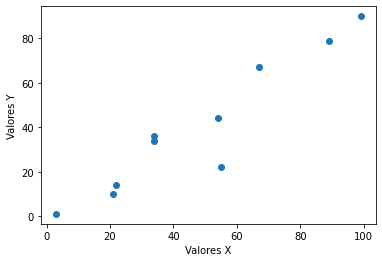

In [3]:
# Separa os x e os y em listas diferentes
x = [par[0] for par in pares_xy]
y = [par[1] for par in pares_xy]

plt.scatter(x, y)
plt.xlabel("Valores X")
plt.ylabel("Valores Y")

Visualmente, a função y(x) se assemelha a uma função linear descrita por y(x) = a*x + b

In [4]:
def funcao_linear(a, b, x):
    return a*x + b

Para descobrirmos a melhor aproximação de 'a' e 'b', precisamos de uma métrica de proximidade.
Uma das possíveis métricas é o método dos mínimos quadrados

In [5]:
def residuo_metodo_minimos_quadrados(y_medido, y_aproximado):
    residuo = 0
    for i in range(len(y_medido)):
        residuo += (y_medido[i]-y_aproximado[i])**2
    return residuo

Agora podemos testar iterativamente diferentes valores de 'a' e 'b', afim de minimizar o resíduo acima

In [8]:
def gera_y_aproximado(a,b,x_medido):
    numeros = len(x_medido)
    y_aproximado = []
    # Para cada x_i, gera o valor aproximado de y_i(x_i) = a*x_i + b
    for i in range(numeros):
        y_aproximado.append(funcao_linear(a,b,x_medido[i]))
    return y_aproximado

def iteracao(a, b, x_medido, y_medido, taxa_aprendizagem):
    numeros = len(y_medido)

    y_aproximado = gera_y_aproximado(a,b,x_medido)

    # Calcula o ajuste para parâmetros 'a' e 'b'
    residuo_a = sum([(y_aproximado[i]-y_medido[i])*x_medido[i] for i in range(numeros)])/numeros
    residuo_b = sum([(y_aproximado[i]-y_medido[i]) for i in range(numeros)])/numeros

    # Retorna os valores de 'a' e 'b' ajustados
    a = a - taxa_aprendizagem*residuo_a
    b = b - taxa_aprendizagem*residuo_b

    return a,b

def minimizacao_residuo(x_medido, y_medido, taxa_aprendizagem, iteracoes=100):
    # Escolhemos 'a' e 'b' iniciais aleatoriamente
    import random
    a = random.random()
    b = random.random()

    # Depois executamos uma série de iterações,
    # ajustando os valores de 'a' e 'b' progressivamente
    for it in range(iteracoes):
        a, b = iteracao(a,b,x_medido,y_medido,taxa_aprendizagem)

        y_aproximado = gera_y_aproximado(a,b,x_medido)
        residuo = residuo_metodo_minimos_quadrados(y_medido, y_aproximado)
        print("Iteração %d: a=%.3f, b=%.3f, residuo %.1f" % (it, a, b, residuo))

        if it % int(iteracoes/5) == 0 or it == (iteracoes-1):
            plt.xlabel("X Medido")
            plt.ylabel("Y Aproximado")
            plt.plot(x_medido, y_aproximado, label="y_aprox it=%d residuo=%.1f" % (it, residuo))

    plt.scatter(x_medido, y_medido, label="y_medido")
    plt.legend()


Iteração 0: a=0.755, b=0.584, residuo 1212.3
Iteração 1: a=0.758, b=0.584, residuo 1195.4
Iteração 2: a=0.761, b=0.584, residuo 1179.6
Iteração 3: a=0.764, b=0.585, residuo 1164.7
Iteração 4: a=0.766, b=0.585, residuo 1150.8
Iteração 5: a=0.769, b=0.585, residuo 1137.7
Iteração 6: a=0.771, b=0.585, residuo 1125.5
Iteração 7: a=0.774, b=0.585, residuo 1114.0
Iteração 8: a=0.776, b=0.585, residuo 1103.2
Iteração 9: a=0.778, b=0.585, residuo 1093.1
Iteração 10: a=0.781, b=0.585, residuo 1083.6
Iteração 11: a=0.783, b=0.585, residuo 1074.6
Iteração 12: a=0.785, b=0.585, residuo 1066.3
Iteração 13: a=0.787, b=0.585, residuo 1058.4
Iteração 14: a=0.789, b=0.585, residuo 1051.1
Iteração 15: a=0.791, b=0.585, residuo 1044.2
Iteração 16: a=0.792, b=0.585, residuo 1037.7
Iteração 17: a=0.794, b=0.585, residuo 1031.6
Iteração 18: a=0.796, b=0.585, residuo 1025.9
Iteração 19: a=0.798, b=0.585, residuo 1020.6
Iteração 20: a=0.799, b=0.585, residuo 1015.5
Iteração 21: a=0.801, b=0.585, residuo 1010.

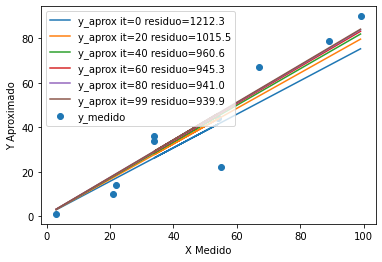

In [9]:
# taxa de aprendizagem de 1e-5
minimizacao_residuo(x,y, 1e-5)

Iteração 0: a=0.622, b=0.133, residuo 2635.8
Iteração 1: a=0.622, b=0.133, residuo 2635.8
Iteração 2: a=0.622, b=0.133, residuo 2635.8
Iteração 3: a=0.622, b=0.133, residuo 2635.8
Iteração 4: a=0.622, b=0.133, residuo 2635.8
Iteração 5: a=0.622, b=0.133, residuo 2635.8
Iteração 6: a=0.622, b=0.133, residuo 2635.8
Iteração 7: a=0.622, b=0.133, residuo 2635.8
Iteração 8: a=0.622, b=0.133, residuo 2635.8
Iteração 9: a=0.622, b=0.133, residuo 2635.8
Iteração 10: a=0.622, b=0.133, residuo 2635.8
Iteração 11: a=0.622, b=0.133, residuo 2635.8
Iteração 12: a=0.622, b=0.133, residuo 2635.8
Iteração 13: a=0.622, b=0.133, residuo 2635.8
Iteração 14: a=0.622, b=0.133, residuo 2635.8
Iteração 15: a=0.622, b=0.133, residuo 2635.8
Iteração 16: a=0.622, b=0.133, residuo 2635.8
Iteração 17: a=0.622, b=0.133, residuo 2635.8
Iteração 18: a=0.622, b=0.133, residuo 2635.8
Iteração 19: a=0.622, b=0.133, residuo 2635.8
Iteração 20: a=0.622, b=0.133, residuo 2635.8
Iteração 21: a=0.622, b=0.133, residuo 2635.

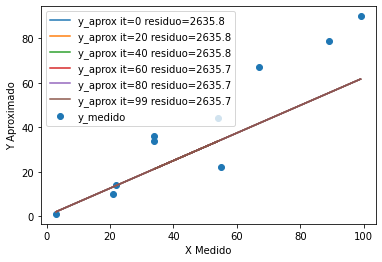

In [18]:
# taxa de aprendizagem de 1e-10
minimizacao_residuo(x,y, 1e-10)

Iteração 0: a=0.910, b=0.263, residuo 1032.4
Iteração 1: a=0.892, b=0.262, residuo 978.4
Iteração 2: a=0.880, b=0.262, residuo 952.9
Iteração 3: a=0.872, b=0.262, residuo 941.0
Iteração 4: a=0.866, b=0.261, residuo 935.4
Iteração 5: a=0.862, b=0.261, residuo 932.7
Iteração 6: a=0.859, b=0.261, residuo 931.4
Iteração 7: a=0.857, b=0.261, residuo 930.9
Iteração 8: a=0.856, b=0.261, residuo 930.6
Iteração 9: a=0.855, b=0.260, residuo 930.4
Iteração 10: a=0.855, b=0.260, residuo 930.4
Iteração 11: a=0.854, b=0.260, residuo 930.3
Iteração 12: a=0.854, b=0.260, residuo 930.3
Iteração 13: a=0.854, b=0.260, residuo 930.3
Iteração 14: a=0.854, b=0.260, residuo 930.3
Iteração 15: a=0.854, b=0.260, residuo 930.3
Iteração 16: a=0.853, b=0.259, residuo 930.3
Iteração 17: a=0.853, b=0.259, residuo 930.3
Iteração 18: a=0.853, b=0.259, residuo 930.3
Iteração 19: a=0.853, b=0.259, residuo 930.3
Iteração 20: a=0.853, b=0.259, residuo 930.3
Iteração 21: a=0.853, b=0.259, residuo 930.3
Iteração 22: a=0.85

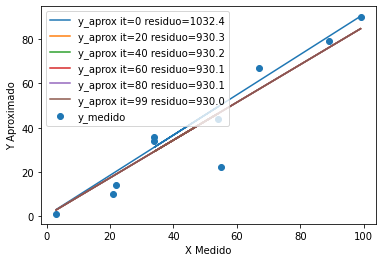

In [19]:
# taxa de aprendizagem de 1e-4
minimizacao_residuo(x,y, 1e-4)

Iteração 0: a=0.512, b=0.538, residuo 4502.5
Iteração 1: a=0.513, b=0.538, residuo 4480.2
Iteração 2: a=0.514, b=0.538, residuo 4457.9
Iteração 3: a=0.515, b=0.538, residuo 4435.9
Iteração 4: a=0.516, b=0.538, residuo 4413.9
Iteração 5: a=0.517, b=0.538, residuo 4392.1
Iteração 6: a=0.518, b=0.538, residuo 4370.5
Iteração 7: a=0.519, b=0.538, residuo 4348.9
Iteração 8: a=0.521, b=0.538, residuo 4327.6
Iteração 9: a=0.522, b=0.538, residuo 4306.3
Iteração 10: a=0.523, b=0.538, residuo 4285.2
Iteração 11: a=0.524, b=0.538, residuo 4264.2
Iteração 12: a=0.525, b=0.538, residuo 4243.3
Iteração 13: a=0.526, b=0.538, residuo 4222.6
Iteração 14: a=0.527, b=0.538, residuo 4202.0
Iteração 15: a=0.528, b=0.538, residuo 4181.5
Iteração 16: a=0.529, b=0.538, residuo 4161.2
Iteração 17: a=0.530, b=0.538, residuo 4141.0
Iteração 18: a=0.531, b=0.538, residuo 4120.9
Iteração 19: a=0.532, b=0.538, residuo 4100.9
Iteração 20: a=0.533, b=0.538, residuo 4081.1
Iteração 21: a=0.534, b=0.538, residuo 4061.

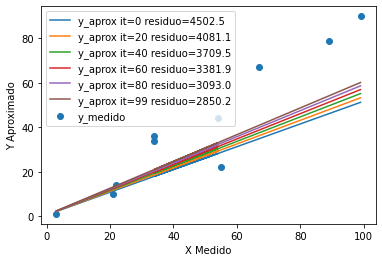

In [20]:
# taxa de aprendizagem de 1e-6
minimizacao_residuo(x,y, 1e-6)

E o que acontece se fizermos um ajuste mais fino? Ou seja, com menor taxa de aprendizagem?
Precisaremos de mais iterações para convergir para o resultado final, porém conseguimos valores mais precisos.

Iteração 0: a=0.154, b=0.280, residuo 16273.0
Iteração 1: a=0.156, b=0.280, residuo 16176.7
Iteração 2: a=0.158, b=0.280, residuo 16081.1
Iteração 3: a=0.161, b=0.280, residuo 15986.1
Iteração 4: a=0.163, b=0.280, residuo 15891.7
Iteração 5: a=0.165, b=0.280, residuo 15797.9
Iteração 6: a=0.167, b=0.280, residuo 15704.7
Iteração 7: a=0.169, b=0.280, residuo 15612.0
Iteração 8: a=0.171, b=0.280, residuo 15519.9
Iteração 9: a=0.174, b=0.280, residuo 15428.5
Iteração 10: a=0.176, b=0.280, residuo 15337.5
Iteração 11: a=0.178, b=0.280, residuo 15247.2
Iteração 12: a=0.180, b=0.280, residuo 15157.4
Iteração 13: a=0.182, b=0.280, residuo 15068.2
Iteração 14: a=0.184, b=0.280, residuo 14979.5
Iteração 15: a=0.186, b=0.280, residuo 14891.4
Iteração 16: a=0.188, b=0.280, residuo 14803.9
Iteração 17: a=0.190, b=0.280, residuo 14716.9
Iteração 18: a=0.192, b=0.280, residuo 14630.4
Iteração 19: a=0.195, b=0.280, residuo 14544.5
Iteração 20: a=0.197, b=0.280, residuo 14459.2
Iteração 21: a=0.199, b

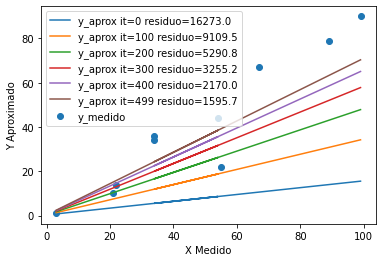

In [21]:
minimizacao_residuo(x,y, 1e-6, iteracoes=500)

Iteração 0: a=0.274, b=0.266, residuo 11463.5
Iteração 1: a=0.276, b=0.266, residuo 11397.5
Iteração 2: a=0.278, b=0.266, residuo 11331.9
Iteração 3: a=0.279, b=0.266, residuo 11266.6
Iteração 4: a=0.281, b=0.266, residuo 11201.8
Iteração 5: a=0.283, b=0.266, residuo 11137.4
Iteração 6: a=0.285, b=0.266, residuo 11073.4
Iteração 7: a=0.287, b=0.266, residuo 11009.8
Iteração 8: a=0.288, b=0.266, residuo 10946.6
Iteração 9: a=0.290, b=0.266, residuo 10883.8
Iteração 10: a=0.292, b=0.266, residuo 10821.3
Iteração 11: a=0.294, b=0.266, residuo 10759.3
Iteração 12: a=0.295, b=0.266, residuo 10697.7
Iteração 13: a=0.297, b=0.266, residuo 10636.4
Iteração 14: a=0.299, b=0.266, residuo 10575.6
Iteração 15: a=0.301, b=0.266, residuo 10515.1
Iteração 16: a=0.302, b=0.266, residuo 10455.0
Iteração 17: a=0.304, b=0.267, residuo 10395.2
Iteração 18: a=0.306, b=0.267, residuo 10335.9
Iteração 19: a=0.308, b=0.267, residuo 10276.9
Iteração 20: a=0.309, b=0.267, residuo 10218.3
Iteração 21: a=0.311, b

Iteração 2483: a=0.853, b=0.272, residuo 930.6
Iteração 2484: a=0.853, b=0.272, residuo 930.6
Iteração 2485: a=0.853, b=0.272, residuo 930.6
Iteração 2486: a=0.853, b=0.272, residuo 930.6
Iteração 2487: a=0.853, b=0.272, residuo 930.6
Iteração 2488: a=0.853, b=0.272, residuo 930.6
Iteração 2489: a=0.853, b=0.272, residuo 930.6
Iteração 2490: a=0.853, b=0.272, residuo 930.6
Iteração 2491: a=0.853, b=0.272, residuo 930.6
Iteração 2492: a=0.853, b=0.272, residuo 930.6
Iteração 2493: a=0.853, b=0.272, residuo 930.6
Iteração 2494: a=0.853, b=0.272, residuo 930.6
Iteração 2495: a=0.853, b=0.272, residuo 930.6
Iteração 2496: a=0.853, b=0.272, residuo 930.6
Iteração 2497: a=0.853, b=0.272, residuo 930.6
Iteração 2498: a=0.853, b=0.272, residuo 930.6
Iteração 2499: a=0.853, b=0.272, residuo 930.6
Iteração 2500: a=0.853, b=0.272, residuo 930.6
Iteração 2501: a=0.853, b=0.272, residuo 930.6
Iteração 2502: a=0.853, b=0.272, residuo 930.6
Iteração 2503: a=0.853, b=0.271, residuo 930.6
Iteração 2504

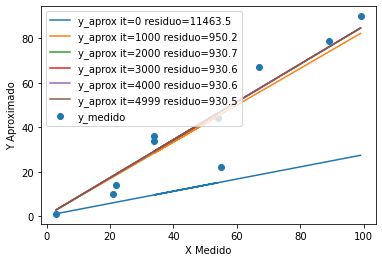

In [23]:
minimizacao_residuo(x,y, 1e-6, iteracoes=5000)

E se quisermos acelerar o processo aumentando a taxa de aprendizado?
O ajuste pode ser grande demais, fazendo com que a busca da melhor aproximação divirja, se afaste, do resultado desejado.

Iteração 0: a=0.716, b=0.877, residuo 1128.0
Iteração 1: a=1.274, b=0.884, residuo 4356.8
Iteração 2: a=0.073, b=0.865, residuo 19327.1
Iteração 3: a=2.659, b=0.902, residuo 88737.5
Iteração 4: a=-2.909, b=0.818, residuo 410559.8
Iteração 5: a=9.080, b=0.996, residuo 1902692.8
Iteração 6: a=-16.735, b=0.610, residuo 8820986.7
Iteração 7: a=38.851, b=1.437, residuo 40897744.9
Iteração 8: a=-80.839, b=-0.349, residuo 189622044.8
Iteração 9: a=176.884, b=3.493, residuo 879184164.6


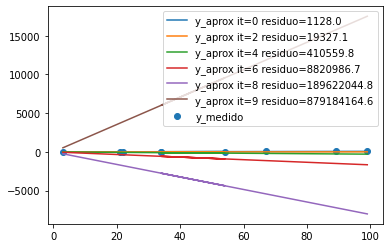

In [8]:
minimizacao_residuo(x, y, 1e-3, iteracoes=10)

Iteração 0: a=-3.198, b=0.780, residuo 514270.5
Iteração 1: a=123.756, b=2.698, residuo 474558819.2
Iteração 2: a=-3736.317, b=-56.088, residuo 438719694664.5
Iteração 3: a=113630.291, b=1730.830, residuo 405587981368281.8
Iteração 4: a=-3454934.011, b=-52601.361, residuo 374958345807028672.0
Iteração 5: a=105048254.445, b=1599383.507, residuo 346641832473355747328.0
Iteração 6: a=-3194021317.010, b=-48629675.555, residuo 320463756479037230284800.0
Iteração 7: a=97115105006.292, b=1478598811.128, residuo 296262624980640247362617344.0
Iteração 8: a=-2952811732186.059, b=-44957207369.594, residuo 273889140927426431392589807616.0
Iteração 9: a=89781060580141.406, b=1366936372689.435, residuo 253205282046176536381236478738432.0


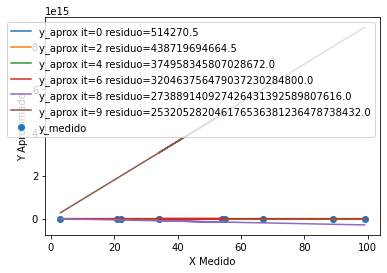

In [31]:
minimizacao_residuo(x, y, 1e-2, iteracoes=10)